In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
# import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [48]:
tickers = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]

start_date = '2018-01-01'
end_date = '2021-09-01'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)

In [49]:
close = panel_data['Close']
adj_close = panel_data['Adj Close']

In [50]:
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 2018-01-02 to 2021-09-01
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GNRC)  924 non-null    float64
 1   (Adj Close, CPRT)  924 non-null    float64
 2   (Adj Close, ODFL)  924 non-null    float64
 3   (Adj Close, AMD)   924 non-null    float64
 4   (Adj Close, PAYC)  924 non-null    float64
 5   (Adj Close, CHTR)  924 non-null    float64
 6   (Adj Close, MKC)   924 non-null    float64
 7   (Adj Close, PG)    924 non-null    float64
 8   (Adj Close, PGR)   924 non-null    float64
 9   (Adj Close, NEM)   924 non-null    float64
 10  (Adj Close, CCI)   924 non-null    float64
 11  (Close, GNRC)      924 non-null    float64
 12  (Close, CPRT)      924 non-null    float64
 13  (Close, ODFL)      924 non-null    float64
 14  (Close, AMD)       924 non-null    float64
 15  (Close, PAYC)      924 non-null    float64
 16  (Close,

In [51]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]
num_stocks = len(port_list)
num_stocks

11

## Plot Growth of Investments over Total Dataset

<AxesSubplot:xlabel='Date'>

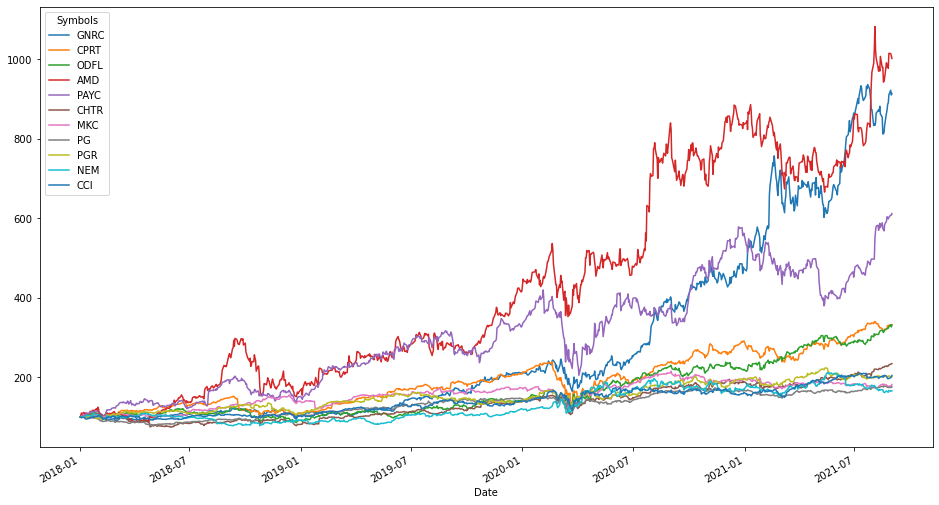

In [52]:
(adj_close / adj_close.iloc[0] * 100).plot(figsize=(16, 9))

## Mean Returns

In [53]:
returns = np.log(adj_close / adj_close.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

Symbols
GNRC    0.603930
CPRT    0.327972
ODFL    0.327088
AMD     0.629130
PAYC    0.494435
CHTR    0.232728
MKC     0.163806
PG      0.154839
PGR     0.191840
NEM     0.138569
CCI     0.195733
dtype: float64

## Covariance

In [54]:
returns.cov() * 252

Symbols,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Symbols,,,,,,,,,,,
GNRC,0.158177,0.062339,0.060450,0.086634,0.086730,0.043115,0.034057,0.030056,0.041879,0.025434,0.044316
CPRT,0.062339,0.099872,0.051419,0.067348,0.086944,0.038190,0.029281,0.026669,0.031825,0.017820,0.035088
ODFL,0.060450,0.051419,0.101292,0.065630,0.063124,0.035207,0.028707,0.023815,0.038243,0.016185,0.031073
AMD,0.086634,0.067348,0.065630,0.312339,0.116016,0.056724,0.036053,0.032016,0.044064,0.035410,0.043460
PAYC,0.086730,0.086944,0.063124,0.116016,0.227547,0.052287,0.042660,0.034098,0.055359,0.022458,0.059203
CHTR,0.043115,0.038190,0.035207,0.056724,0.052287,0.084964,0.023719,0.026277,0.029208,0.015069,0.035420
MKC,0.034057,0.029281,0.028707,0.036053,0.042660,0.023719,0.068122,0.034220,0.031299,0.019388,0.039424
PG,0.030056,0.026669,0.023815,0.032016,0.034098,0.026277,0.034220,0.050054,0.030456,0.012606,0.034797
PGR,0.041879,0.031825,0.038243,0.044064,0.055359,0.029208,0.031299,0.030456,0.074192,0.014799,0.035843


## Correlation

In [55]:
returns.corr()

Symbols,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Symbols,,,,,,,,,,,
GNRC,1.000000,0.495985,0.477567,0.389768,0.457155,0.371910,0.328088,0.337784,0.386586,0.195446,0.400948
CPRT,0.495985,1.000000,0.511229,0.381318,0.576739,0.414583,0.354993,0.377197,0.369710,0.172334,0.399524
ODFL,0.477567,0.511229,1.000000,0.368979,0.415788,0.379514,0.345591,0.334462,0.441149,0.155418,0.351313
AMD,0.389768,0.381318,0.368979,1.000000,0.435181,0.348203,0.247161,0.256060,0.289465,0.193637,0.279824
PAYC,0.457155,0.576739,0.415788,0.435181,1.000000,0.376047,0.342646,0.319504,0.426060,0.143887,0.446592
CHTR,0.371910,0.414583,0.379514,0.348203,0.376047,1.000000,0.311768,0.402937,0.367882,0.157998,0.437258
MKC,0.328088,0.354993,0.345591,0.247161,0.342646,0.311768,1.000000,0.586032,0.440254,0.227019,0.543525
PG,0.337784,0.377197,0.334462,0.256060,0.319504,0.402937,0.586032,1.000000,0.499774,0.172205,0.559662
PGR,0.386586,0.369710,0.441149,0.289465,0.426060,0.367882,0.440254,0.499774,1.000000,0.166051,0.473504


## Generate Random Weights Equal to 1

In [56]:
# Generate 7 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.13049287 0.13355054 0.07133392 0.17547553 0.06296034 0.0514666
 0.18156531 0.10540391 0.00889801 0.06497986 0.01387312]
Total Weight : 0.9999999999999999


## Calculating Return of Portfolio

In [57]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.3589351020494035

## Calculating Volatility

In [58]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2403310836722519

## Analyzing Returns & Risks of 10000 Combinations

In [59]:
risk_free_rate = 0.01
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.31396187, 0.30024349, 0.29166353, ..., 0.33098102, 0.30345517,
        0.30217229]),
 array([0.22093871, 0.22243491, 0.2173614 , ..., 0.22715029, 0.21069976,
        0.21622005]),
 array([1.37577461, 1.30484687, 1.29583048, ..., 1.41307775, 1.39276463,
        1.35127289]),
 array([[0.15636145, 0.00858104, 0.10061574, ..., 0.16458115, 0.06701148,
         0.02576041],
        [0.00373911, 0.15222091, 0.11219967, ..., 0.15242223, 0.15359834,
         0.07647029],
        [0.05871281, 0.06147738, 0.01215251, ..., 0.1575325 , 0.07521757,
         0.16004264],
        ...,
        [0.14592213, 0.01740642, 0.15271878, ..., 0.15616507, 0.09678581,
         0.14354764],
        [0.1698695 , 0.00181502, 0.12624987, ..., 0.12655035, 0.11855095,
         0.05232432],
        [0.07935815, 0.03769278, 0.12295672, ..., 0.12486812, 0.07932849,
         0.14059173]]))

## Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

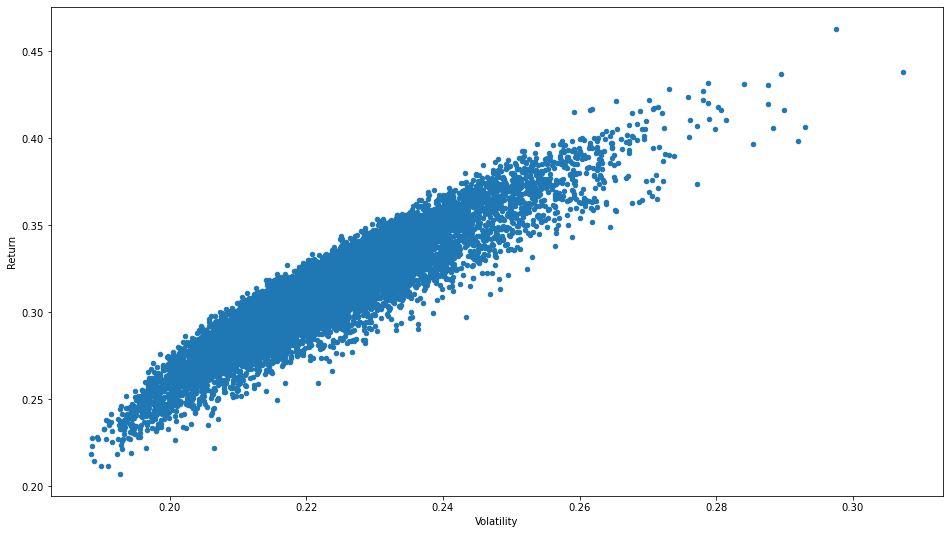

In [60]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

In [61]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : GNRC : 29.56
Stock : CPRT : 20.28
Stock : ODFL : 6.04
Stock : AMD : 14.05
Stock : PAYC : 3.16
Stock : CHTR : 5.70
Stock : MKC : 2.95
Stock : PG : 7.40
Stock : PGR : 2.11
Stock : NEM : 7.52
Stock : CCI : 1.24

Volatility : 0.2591158105402441
Return : 0.415204821951002


In [23]:
weights = [0.15, 0.20, 0.2, 0.15, 0.1, 0.1, 0.1]
weighted_return_series = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
# return_series_weighted = weighted_return_series.sum(axis=1) #add up the returns from the 2 ETFs

In [24]:
adj_close['daily returns'] = weighted_return_series

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_2679/2714636857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close['daily returns'] = weighted_return_series


In [25]:
adj_close

Symbols,AAPL,AMZN,MSFT,NFLX,TSLA,NVDA,EBAY,daily returns
Date,,,,,,,,
2010-12-31,9.864282,180.000000,21.960526,25.100000,5.326000,3.536048,11.203469,NaN
2011-01-03,10.078656,184.220001,22.015610,25.487143,5.324000,3.632485,11.545652,0.003260
2011-01-04,10.131253,185.009995,22.102158,25.910000,5.334000,3.621005,11.461113,0.004060
2011-01-05,10.214128,187.419998,22.031351,25.675714,5.366000,3.898836,11.565783,0.005320
2011-01-06,10.205870,185.860001,22.676550,25.427143,5.576000,4.438429,11.440986,0.005194
...,...,...,...,...,...,...,...,...
2021-12-27,180.100540,3393.389893,341.743378,613.119995,1093.939941,309.397308,65.389038,2.588677
2021-12-28,179.061859,3413.219971,340.545837,610.710022,1088.469971,303.168335,65.807304,2.572882
2021-12-29,179.151749,3384.020020,341.244415,610.539978,1086.189941,299.958893,66.185730,2.574249
